## Import libraries

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

## Load CSV data

In [53]:
df = pd.read_csv('1000_richest_people_in_the_world.csv')

## Dataset Overview 

In [54]:
df.head()

,Name,Country,Industry,Net Worth (in billions),Company
0,Rob Walton,Mexico,Finance,8.50,Walmart
1,Sergey Brin,USA,Automotive,44.76,Google
2,Steve Ballmer,USA,Manufacturing,13.43,Koch Industries
3,Mukesh Ambani,USA,Technology,120.44,Google
4,Jim Walton,USA,Fashion,122.39,Walmart


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name                     1000 non-null   object 
 1   Country                  1000 non-null   object 
 2   Industry                 1000 non-null   object 
 3   Net Worth (in billions)  1000 non-null   float64
 4   Company                  1000 non-null   object 
dtypes: float64(1), object(4)
memory usage: 39.2+ KB


## Country with most Billionaires 

In [56]:
country_grouped = df.groupby('Country')['Net Worth (in billions)'].count().sort_values(ascending=False).reset_index()
print(f"Country with most Billionaires: {country_grouped['Country'][0]}")

Country with most Billionaires: USA


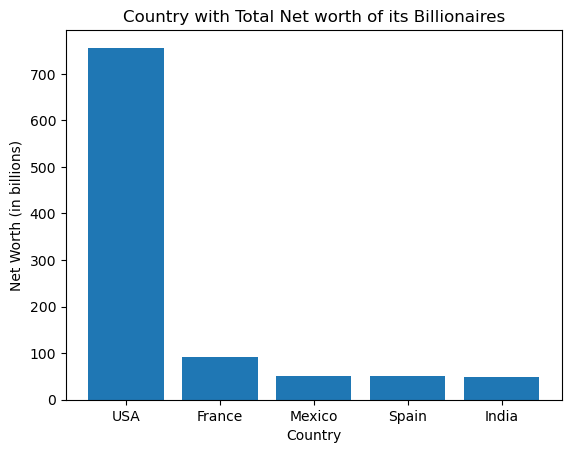

In [57]:
plt.bar(country_grouped['Country'],country_grouped['Net Worth (in billions)'])
plt.title("Country with Total Net worth of its Billionaires")
plt.xlabel("Country")
plt.ylabel("Net Worth (in billions)")
plt.show()

## People with Net worth > 150 billions

In [58]:
ten_billion = df[df['Net Worth (in billions)']>150].reset_index(drop=True)
ten_billion

,Name,Country,Industry,Net Worth (in billions),Company
0,Alice Walton,USA,Technology,167.09,Zara
1,Alice Walton,USA,Technology,192.96,Oracle
2,Larry Ellison,USA,Media,167.65,Koch Industries
3,Larry Page,USA,Technology,184.80,Berkshire Hathaway
4,Amancio Ortega,USA,Manufacturing,197.26,Zara
...,...,...,...,...,...
257,Steve Ballmer,USA,Retail,187.02,Microsoft
258,David Koch,USA,Cosmetics,185.84,Walmart
259,Amancio Ortega,USA,Media,166.87,Walmart
260,Amancio Ortega,Spain,Retail,163.18,Reliance Industries


### Combined Net worth of people with Net worth > 150 Billions, in each Country 

In [59]:
tenB_country_counts = ten_billion.groupby('Country')['Net Worth (in billions)'].count().sort_values(ascending=False).reset_index()
tenB_country_counts

,Country,Net Worth (in billions)
0,USA,206
1,France,22
2,India,13
3,Mexico,13
4,Spain,8


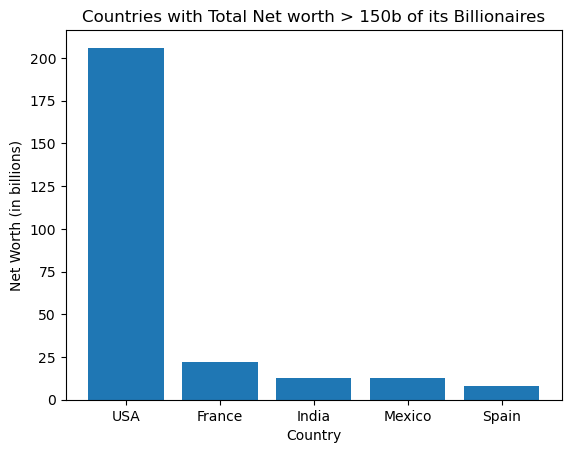

In [60]:
plt.bar(tenB_country_counts['Country'],tenB_country_counts['Net Worth (in billions)'])
plt.title("Countries with Total Net worth > 150b of its Billionaires")
plt.xlabel("Country")
plt.ylabel("Net Worth (in billions)")
plt.show()

## Industries with their Net worth 

### Industry with highest combined Net worth

In [61]:
tenB_inds_counts = df.groupby('Industry')['Net Worth (in billions)'].count().sort_values(ascending=False).reset_index()
print(f"Industry with highest combined Net Worth: {tenB_inds_counts['Industry'][0]} , {tenB_inds_counts['Net Worth (in billions)'][0]} billions")

Industry with highest combined Net Worth: Technology , 350 billions


In [62]:
tenB_inds_counts

,Industry,Net Worth (in billions)
0,Technology,350
1,Retail,217
2,Manufacturing,94
3,Media,57
4,Cosmetics,51
5,Telecommunications,51
6,Finance,50
7,Fashion,44
8,Automotive,43
9,Petrochemicals,43


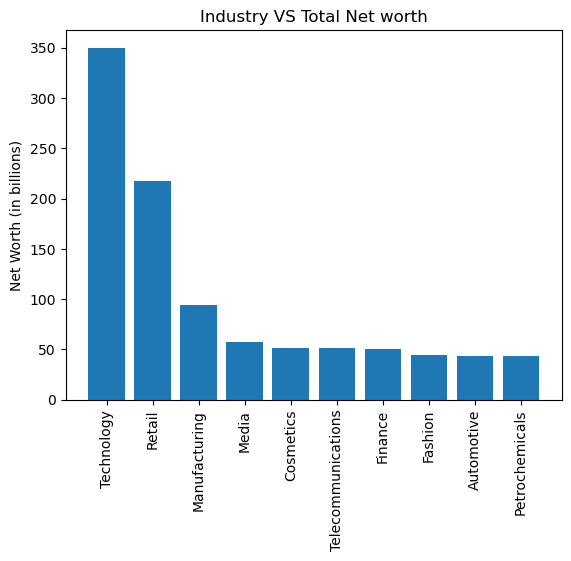

In [63]:
plt.bar(tenB_inds_counts['Industry'],tenB_inds_counts['Net Worth (in billions)'])
plt.title("Industry VS Total Net worth")
# plt.xlabel("Industry")
plt.ylabel("Net Worth (in billions)")
plt.xticks(rotation=90)
plt.show()

## Top 10 Richest people, with combined worth of all companies in all Industries

In [64]:
top_10_men = df.groupby(by='Name')['Net Worth (in billions)'].sum().sort_values(ascending=False).reset_index().head(10)
top_10_men

,Name,Net Worth (in billions)
0,Amancio Ortega,7222.63
1,Larry Ellison,7132.89
2,Elon Musk,6308.31
3,Michael Bloomberg,6008.78
4,Rob Walton,5976.81
5,Bill Gates,5930.01
6,Mukesh Ambani,5357.31
7,Sergey Brin,5263.97
8,Jim Walton,5197.47
9,Warren Buffett,4952.39


## Top 10 companies, with combined worth of all people in all Industries

In [65]:
top_10_cmp = df.groupby(by='Company')['Net Worth (in billions)'].sum().sort_values(ascending=False).reset_index().head(10)
top_10_cmp

,Company,Net Worth (in billions)
0,Walmart,15668.19
1,Microsoft,10466.70
2,Koch Industries,10233.88
3,Google,9812.82
4,LVMH,6270.89
5,Zara,5420.27
6,Reliance Industries,5396.04
7,Facebook,5382.44
8,Grupo Carso,5290.69
9,Tesla,5162.66
